In [56]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)
import sys
np.set_printoptions(threshold=sys.maxsize)
### global variable:
g_nucleic_acids_types = ['dsDNA', 'dsRNA', 'ssDNA', 'ssRNA']


param_load = False
data_root = '../data/_datasets/cluster_res'
# data_root = 'data/_datasets/cluster_res'
output_dir = 'out_v01'

# 主要数据
# mainf = 'seq_dg_v02.txt'
mainf = 'seq_dg_v02_1.txt'
wtf = 'wt_v02.tsv'


def createDir(p):
  if not os.path.exists(p):
    print("Directory {} doesn't exist, create a new.".format(p))
    os.makedirs(p)

output_dir = os.path.join(data_root, output_dir)
createDir(output_dir)

# mutation_type
# exp_id, key_complex
# protein_index, key_nucleic_acids
# protein_sequence nucleotide_sequence dG 
list_cols = ['exp_id', 'key_complex', 'UniProt', 'protein_sequence', 'nucleotide_sequence', 
             'nucleic_acid_type_new', 'dG', 'dG_ori', 'key_nucleic_acids', 'protein_index',
            'wt_complex','pclass','nuclass','base_class','avg_dist_to_others']
mainf = os.path.join(data_root, mainf)
# madf = pd.read_csv(mainf, sep='\t', low_memory=False, usecols=list_cols)
madf = pd.read_csv(mainf, sep='\t', low_memory=False)
print(len(madf))
madf.head(3)
# wtf = os.path.join(data_root, wtf)
# wtdf = pd.read_csv(wtf, sep='\t', low_memory=False)
# print(len(wtdf))


17199


,exp_id,key_complex,dataset_id,UniProt,protein_sequence,nucleotide_sequence,nucleic_acid_mutation,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,pH,Tm,Method,pmid,data_source,protein_na_pair,multiple_dg,max_min,max_min_judge,dG_ori,pdb_id,len_p1,len_p2,protein_chain,na_chain,identity_protein_seq,identity_na_seq,UniProt_type,protein_sequence_len,wt_af2_file_download,mo_pdb_chain,bs_score,nucleotide_sequence_one,nucleotide_sequence_two,nucleotide_sequence_two_reverse,align_score,len_nucleotide_sequence_one,len_nucleotide_sequence_two,coverage_nucleotide_sequence_one,coverage_nucleotide_sequence_two,coverage_mean_nucleotide_sequence,protein_index,cluster_protein_50_index,cluster_protein_50_number,cluster_protein_50_member,na_index,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50_member,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid,nucleotide_sequence_fornew_na_fea,newnafea_na_job,AF2_filname,AF2_protein_sequence_len,pLDDT_median,protein_50_na_50_member_Li_clustertype,protein_50_na_50_number_Li_clustertype,cluster_protein_na_pair_index_Li_clustertype,mutation_type,protein_sequence_number,protein_sequence_wild,complex_type,dist_index,key_nucleic_acids,wt_complex,pclass,nuclass,base_class,avg_dist_to_others
0,0,0,pnat_143,P04150,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,CGCCTCCGGGAGAGCT,NONE,WILD,ssDNA,ssDNA,3.6e-07,-8.79,7.5,298.0,Isothermal titration calorimetry,23222642,pnat,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,1,0.0,good,-8.79,3fyl,"A:74,B:76","C:16,D:16",A_1.B_1,C_1.D_1,0.1,0.25,Swiss-Prot,777,yes,"1m2z_A,6cfn_C","0.7293488372093023,0.23546511627906977",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_6,Cluster_43,9,"protein_6,protein_965,protein_966,protein_1059...",ssDNA0,Cluster_1008,1,ssDNA0,protein_6_ssDNA0,protein_6_ssDNA0,1,cluster_pair_0,pnat_143_3fyl_protein_6,Rattus norvegicus,DNA_0022,CGCCTCCGGGAGAGCT,new_DNA_0,AF-P04150-F1-model_v4.pdb,777,40.51,"protein_6_ssDNA0,protein_34_ssDNA28,protein_34...",29,cluster_pair_0,WILD,6,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,wt,ssDNA0,Single_DNA_0,True,PCluster_445,SDNACluster_1394,SDNACluster_1394-PCluster_445,3.384718
1,1,1,pnat_13395,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,NONE,WILD,DNA,ssDNA,1.83e-06,-7.83,7.8,298.0,Fluorescence,18729380,pnat,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,1,0.0,good,-7.83,1jmc,A:238,B:8,A_1,B_1,0.39,0.12,Swiss-Prot,616,yes,"1fgu_A,1l1o_C,2b29_A","0.4446617647058823,0.3088235294117647,0.214705...",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_12,Cluster_30,22,"protein_12,protein_2647,protein_2658,protein_2...",ssDNA1,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA1,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13395_1jmc_protein_12,Homo sapiens,DNA_0225,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,new_DNA_1,AF-P27694-F1-model_v4.pdb,616,92.17,"protein_12_ssDNA1,protein_12_ssDNA2,protein_12...",47,cluster_pair_1,WILD,22,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,wt,ssDNA1,Single_DNA_1,True,PCluster_446,SDNACluster_1441,SDNACluster_1441-PCluster_446,3.386447
2,2,2,pnat_13396,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,NONE,WILD,DNA,ssDNA,1.39e-06,-7.99,7.8,298.0,Fluorescence,18729380,pnat,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,1,0.0,good,-7.99,1jmc,A:238,B:8,A_1,B_1,0.39,0.12,Swiss-Prot,616,yes,"1fgu_A,1l1o_C,2b29_A","0.4446617647058823,0.3088235294117647,0.214705...",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_12,Cluster_30,22,"protein_12,protein_2647,protein_2658,protein_2...",ssDNA2,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA2,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13396_1jmc_protein_12,Homo sapiens,DNA_0226,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,new_DNA_2,AF-P27694-F1-model

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

# set env
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)



data_dir = '../dataset/_datasets/cluster_res/'
data_file = 'seq_dg_v02.txt'
data_file = os.path.join(data_dir, data_file)
main_df = pd.read_csv(data_file, sep='\t', low_memory=False)
print(len(main_df))
main_df.head(6)

16556


,exp_id,key_complex,dataset_id,UniProt,protein_sequence,nucleotide_sequence,nucleic_acid_mutation,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,pH,Tm,Method,pmid,data_source,protein_na_pair,multiple_dg,max_min,max_min_judge,dG_ori,pdb_id,len_p1,len_p2,protein_chain,na_chain,identity_protein_seq,identity_na_seq,UniProt_type,protein_sequence_len,wt_af2_file_download,mo_pdb_chain,bs_score,nucleotide_sequence_one,nucleotide_sequence_two,nucleotide_sequence_two_reverse,align_score,len_nucleotide_sequence_one,len_nucleotide_sequence_two,coverage_nucleotide_sequence_one,coverage_nucleotide_sequence_two,coverage_mean_nucleotide_sequence,protein_index,cluster_protein_50_index,cluster_protein_50_number,cluster_protein_50_member,na_index,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50_member,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid,nucleotide_sequence_fornew_na_fea,newnafea_na_job,AF2_filname,AF2_protein_sequence_len,pLDDT_median,protein_50_na_50_member_Li_clustertype,protein_50_na_50_number_Li_clustertype,cluster_protein_na_pair_index_Li_clustertype,mutation_type,protein_sequence_number,protein_sequence_wild,complex_type,dist_index,key_nucleic_acids
0,0,0,pnat_143,P04150,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,CGCCTCCGGGAGAGCT,NONE,WILD,ssDNA,ssDNA,3.6e-07,-8.79,7.5,298.0,Isothermal titration calorimetry,23222642,pnat,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,1,0.0,good,-8.79,3fyl,"A:74,B:76","C:16,D:16",A_1.B_1,C_1.D_1,0.1,0.25,Swiss-Prot,777,yes,"1m2z_A,6cfn_C","0.7293488372093023,0.23546511627906977",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_6,Cluster_43,9,"protein_6,protein_965,protein_966,protein_1059...",ssDNA0,Cluster_1008,1,ssDNA0,protein_6_ssDNA0,protein_6_ssDNA0,1,cluster_pair_0,pnat_143_3fyl_protein_6,Rattus norvegicus,DNA_0022,CGCCTCCGGGAGAGCT,new_DNA_0,AF-P04150-F1-model_v4.pdb,777,40.51,"protein_6_ssDNA0,protein_34_ssDNA28,protein_34...",29,cluster_pair_0,WILD,6,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,wt,ssDNA0,Single_DNA_0
1,1,1,pnat_13395,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,NONE,WILD,DNA,ssDNA,1.83e-06,-7.83,7.8,298.0,Fluorescence,18729380,pnat,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,1,0.0,good,-7.83,1jmc,A:238,B:8,A_1,B_1,0.39,0.12,Swiss-Prot,616,yes,"1fgu_A,1l1o_C,2b29_A","0.4446617647058823,0.3088235294117647,0.214705...",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_12,Cluster_30,22,"protein_12,protein_2647,protein_2658,protein_2...",ssDNA1,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA1,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13395_1jmc_protein_12,Homo sapiens,DNA_0225,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,new_DNA_1,AF-P27694-F1-model_v4.pdb,616,92.17,"protein_12_ssDNA1,protein_12_ssDNA2,protein_12...",47,cluster_pair_1,WILD,22,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,wt,ssDNA1,Single_DNA_1
2,2,2,pnat_13396,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,NONE,WILD,DNA,ssDNA,1.39e-06,-7.99,7.8,298.0,Fluorescence,18729380,pnat,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,1,0.0,good,-7.99,1jmc,A:238,B:8,A_1,B_1,0.39,0.12,Swiss-Prot,616,yes,"1fgu_A,1l1o_C,2b29_A","0.4446617647058823,0.3088235294117647,0.214705...",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_12,Cluster_30,22,"protein_12,protein_2647,protein_2658,protein_2...",ssDNA2,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA2,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13396_1jmc_protein_12,Homo sapiens,DNA_0226,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,new_DNA_2,AF-P27694-F1-model_v4.pdb,616,92.17,"protein_12_ssDNA1,protein_12_ssDNA2,protein_12...",47,cluster_pair_1,WILD,22,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,wt,ssDNA2,Single_DNA_2
3,3,3,pnat_14707,Q8RNV8,MKIWSKEEVVN

In [20]:
sub_df

,exp_id,key_complex,dataset_id,UniProt,protein_sequence,nucleotide_sequence,nucleic_acid_mutation,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,pH,Tm,Method,pmid,data_source,protein_na_pair,multiple_dg,max_min,max_min_judge,dG_ori,pdb_id,len_p1,len_p2,protein_chain,na_chain,identity_protein_seq,identity_na_seq,UniProt_type,protein_sequence_len,wt_af2_file_download,mo_pdb_chain,bs_score,nucleotide_sequence_one,nucleotide_sequence_two,nucleotide_sequence_two_reverse,align_score,len_nucleotide_sequence_one,len_nucleotide_sequence_two,coverage_nucleotide_sequence_one,coverage_nucleotide_sequence_two,coverage_mean_nucleotide_sequence,protein_index,cluster_protein_50_index,cluster_protein_50_number,cluster_protein_50_member,na_index,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50_member,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid,nucleotide_sequence_fornew_na_fea,newnafea_na_job,AF2_filname,AF2_protein_sequence_len,pLDDT_median,protein_50_na_50_member_Li_clustertype,protein_50_na_50_number_Li_clustertype,cluster_protein_na_pair_index_Li_clustertype,mutation_type,protein_sequence_number,protein_sequence_wild,complex_type,dist_index,key_nucleic_acids
6589,7025,7025,pnat_16878,A0A182DWE3,AASKLEKFTNCYSLSKTLRFKAIPVGKTQENIDNKRLLVEDEKRAE...,GGAAUUUCUACUAAGUGUAGAU,NONE,WILD,RNA,ssRNA,9.5e-08,-9.545,7.5,297.0,MicroScale Thermophoresis,27096363,pnat,AASKLEKFTNCYSLSKTLRFKAIPVGKTQENIDNKRLLVEDEKRAE...,2,0.01,lower_1,-9.55,NONE,NONE,NONE,NONE,NONE,NONE,NONE,TrEMBL,1228,yes,5xuz_A,0.9195718892508145,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_1800,Cluster_490,1,protein_1800,ssRNA306,Cluster_5,1,ssRNA306,protein_1800_ssRNA306,protein_1800_ssRNA306,1,cluster_pair_2017,pnat_16878_NONE_protein_1800,Lachnospiraceae bacterium ND2006,RNA_000331,GGAAUUUCUACUAAGUGUAGAU,new_RNA_306,AF-A0A182DWE3-F1-model_v4.pdb,1228,95.0,"protein_1800_ssRNA306,protein_1800_ssRNA307",2,cluster_pair_178,WILD,1,AASKLEKFTNCYSLSKTLRFKAIPVGKTQENIDNKRLLVEDEKRAE...,wt,ssRNA306,Single_RNA_306
6590,7026,7026,pnat_16874,A0A182DWE3,AASKLEKFTNCYSLSKTLRFKAIPVGKTQENIDNKRLLVEDEKRAE...,GGAAUUUCUACUAAGUGUAGAUCUGAUGGUCCAUGUCUGUUACUC,NONE,WILD,RNA,ssRNA,7.3e-09,-10.530,7.5,297.0,MicroScale Thermophoresis,27096363,pnat,AASKLEKFTNCYSLSKTLRFKAIPVGKTQENIDNKRLLVEDEKRAE...,4,1.06,bigger_1,-11.06,NONE,NONE,NONE,NONE,NONE,NONE,NONE,TrEMBL,1228,yes,5xuz_A,0.9195718892508145,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_1800,Cluster_490,1,protein_1800,ssRNA307,Cluster_6,1,ssRNA307,protein_1800_ssRNA307,protein_1800_ssRNA307,1,cluster_pair_2018,pnat_16874_NONE_protein_1800,Lachnospiraceae bacterium ND2006,RNA_000332,GGAAUUUCUACUAAGUGUAGAUCUGAUGGUCCAUGUCUGUUACUC,new_RNA_307,AF-A0A182DWE3-F1-model_v4.pdb,1228,95.0,"protein_1800_ssRNA306,protein_1800_ssRNA307",2,cluster_pair_178,WILD,1,AASKLEKFTNCYSLSKTLRFKAIPVGKTQENIDNKRLLVEDEKRAE...,wt,ssRNA307,Single_RNA_307
6591,7027,7026,pnat_16875,A0A182DWE3,AASKLEKFTNCYSLSKTLRFKAIPVGKTQENIDNKRLLVEDEKRAE...,GGAAUUUCUACUAAGUGUAGAUCUGAUGGUCCAUGUCUGUUACUC,NONE,WILD,RNA,ssRNA,4.41e-08,-10.530,7.5,297.0,MicroScale Thermophoresis,27096363,pnat,AASKLEKFTNCYSLSKTLRFKAIPVGKTQENIDNKRLLVEDEKRAE...,4,1.06,bigger_1,-10.00,NONE,NONE,NONE,NONE,NONE,NONE,NONE,TrEMBL,1228,yes,5xuz_A,0.9195718892508145,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_1800,Cluster_490,1,protein_1800,ssRNA307,Cluster_6,1,ssRNA307,protein_1800_ssRNA307,protein_1800_ssRNA307,1,cluster_pair_2018,pnat_16875_NONE_protein_1800,Lachnospiraceae bacterium ND2006,RNA_000332,GGAAUUUCUACUAAGUGUAGAUCUGAUGGUCCAUGUCUGUUACUC,new_RNA_307,AF-A0A182DWE3-F1-model_v4.pdb,1228,95.0,"protein_1800_ssRNA306,protein_1800_ssRNA307",2,cluster_pair_178,WILD,1,AASKLEKFTNCYSLSKTLRFKAIPVGKTQENIDNKRLLVEDEKRAE...,wt,ssRNA307,Single_RNA_307
8529,9063,7025,pronab_16635,A0A182DWE3,AASKLEKFTNCYSLSKTLRFKAIPVGKTQENIDNKRLLVEDEKRAE...,GGAAUUUCUACUAAGUGUAGAU,wild,WILD,RNA,ssRNA,9.5e-08,-9.545

In [21]:
exp_id_list = []
seq_list = []
for _, sub_df in main_df.groupby('protein_sequence'):
    exp_id = sub_df['exp_id'].values[0]
    seq = sub_df['protein_sequence'].values[0]
    exp_id_list.append(exp_id)
    seq_list.append(seq)
len(exp_id_list), len(seq_list)

(3010, 3010)

In [27]:
adict = {
    'exp_id': exp_id_list,
    'sequence': seq_list,
}
df = pd.DataFrame(adict)
df.to_csv(os.path.join('data.csv'),index=False, sep='\t')

In [28]:
pd.read_csv('data.csv', sep='\t', low_memory=False)

,exp_id,sequence
0,7025,AASKLEKFTNCYSLSKTLRFKAIPVGKTQENIDNKRLLVEDEKRAE...
1,7028,ASNFTQFVLVNDGGTGNVTVAPSNFANGVAEWISSNSRSQAYKVTC...
2,4073,MAAADGALPEAAALEQPAELPASVRASIERKRQRALMLRQARLAAR...
3,1548,MAAAKAEMQLMSPLQISDPFGSFPHSPTMDNYPKLEEMMLLSNGAP...
4,10514,MAAAKAEMQLMSPLQISDPFGSFPHSPTMDNYPKLEEMMLLSNGAP...
...,...,...
3005,128,VDEAPIYGTTKFKEWWRSGGFSFGKAYEYGPNPHGTNSRSRKPSSN...
3006,130,VDEAPIYGTTKFKEWWRSGGFSFGKAYEYGPNPHGTNSRSRKPSSN...
3007,14,VDEAPIYGTTKFKEWWRSGGFSFGKAYEYGPNPHGTNSRSRKPSSN...
3008,131,VDEAPIYGTTKFKEWWRSGGFSFGKAYEYGPNPHGTNSRSRKPSSN...


In [75]:
nsum = 0
for k, subdf in madf.groupby('base_class'):
    ckey = np.unique(subdf['key_complex'].values)
    ss = subdf['exp_id'].isin(ckey)
    dGs = subdf.loc[ss.index]['dG'].values
    if len(ckey) > 1 and dGs.var() > 1.0:
        print("{} {:.2f}   {}".format(len(ckey), dGs.var(), dGs))
        nsum += 1


4 1.49   [-12.98   -9.59   -9.85  -11.315 -11.315]
2 1.59   [-12.485 -15.005 -12.485 -15.005]
4 1.46   [-14.44666667 -14.44666667 -14.44666667 -14.44666667 -14.44666667
 -14.01       -10.85       -12.44       -14.44666667]
8 4.54   [-0.99   -0.99   -0.99   -0.99   -0.99   -0.99   -0.99   -0.99   -4.36
 -4.36   -5.5375 -5.5375 -5.5375 -5.5375 -5.295  -5.295  -5.295  -5.295
 -0.99   -0.99  ]
2 2.30   [-10.5  -10.5  -10.5   -6.71 -10.5 ]
3 1.85   [ -7.42    -7.42    -7.29    -7.29   -10.4975 -10.4975 -10.4975 -10.4975
 -10.4975 -10.4975 -10.4975 -10.4975 -10.4975 -10.4975 -10.4975 -10.4975]
2 1.73   [-10.5   -7.71  -7.71]
3 3.64   [-12.685 -12.165  -8.405 -12.685 -12.165  -8.405]
3 2.94   [-10.48 -10.48  -9.17  -6.28 -10.48 -10.48  -9.17  -6.28]
5 13.38   [-14.395 -14.395 -14.395 -14.395  -8.18   -6.74   -6.26   -6.26   -6.385
  -6.385  -8.18 ]
5 2.74   [-9.47  -9.75  -6.935 -6.935 -6.855 -6.855 -4.51 ]
2 1.52   [-12.985 -12.985 -12.985 -10.49  -10.49  -10.49  -12.985]
2 2.86   [ -7.66  -

3 4.58   [-13.44  -9.48 -14.7  -14.7 ]
3 2.29   [-11.07  -8.35  -7.53]
4 2.52   [ -6.18  -6.76 -10.6   -6.91  -6.91]
6 2.72   [-12.45  -8.19  -9.26 -10.87 -10.28  -7.55]
2 1.45   [-11.14  -8.73]
9 3.53   [-13.03 -13.03 -13.05 -12.9  -12.9  -12.18 -13.15 -10.67  -8.83 -12.97
  -7.51]
8 1.69   [-10.495  -7.75   -8.2    -6.37   -7.85   -7.76   -7.92   -7.36  -10.495]
2 1.07   [-11.3675 -11.3675  -9.17   -11.3675 -11.3675  -9.17  ]
10 1.32   [-11.73   -9.985  -9.25   -8.595  -9.34  -11.71  -10.17   -8.465 -10.91
  -8.24   -9.985  -9.25   -8.595  -9.34  -11.71  -10.17   -8.465 -10.91 ]
3 3.82   [-12.97 -11.72  -8.34]
17 1.48   [-11.86 -12.27 -14.59 -13.23 -12.81 -11.86 -11.32 -13.23 -10.91 -10.91
 -10.91 -10.91 -14.59 -12.27 -11.86 -12.27 -14.18]
4 6.11   [ -6.38  -6.46  -7.64 -12.42]
2 3.22   [ -7.47  -11.275 -11.275 -11.275 -11.275  -7.47 ]
9 2.15   [-11.34 -11.22 -11.26  -8.73 -10.22 -11.49 -11.2   -8.38  -7.27 -11.34]
2 1.39   [-11.23  -13.585 -11.23  -13.585]
2 10.82   [ -6.46 -13.04]


5 2.25   [-1.97 -5.14 -2.41 -2.53 -5.52]
2 2.18   [-11.665  -8.715  -8.715 -11.665]
3 1.55   [-10.93  -9.14  -7.77  -9.14  -7.77 -10.93  -7.77  -7.77  -7.77  -7.77]
8 1.02   [-11.45 -11.45 -10.27  -8.4   -9.57  -9.62  -8.76  -9.19  -9.65]
5 1.02   [-10.29  -8.75  -9.59  -7.35  -7.99  -7.99]
3 2.61   [-5.48 -9.08 -8.71]
11 13.35   [ -0.02 -12.66 -12.78 -12.3  -12.33 -12.2  -12.53 -13.53 -13.03 -12.37
 -12.9 ]
5 2.04   [ -9.94 -10.15 -13.02 -13.18 -10.56]
2 1.27   [-13.58 -11.33]
12 5.24   [-11.71  -6.06  -6.74 -10.91  -7.25  -5.72  -6.57 -13.14  -8.25  -6.65
  -8.45  -8.45]
4 1.66   [-10.26  -9.85  -9.44  -6.95]
3 1.15   [-9.68 -7.46 -7.36]
2 2.50   [-12.46   -9.295  -9.295 -12.46 ]
2 3.10   [-10.85  -7.33]
2 3.38   [-5.7 -5.7 -9.6]
2 1.19   [-9.93 -7.75]
3 1.18   [-10.5   -8.95 -10.5   -7.95]
8 1.48   [-12.42        -9.3         -9.1         -9.06        -9.85
  -9.93       -12.42        -9.79333333  -9.79333333  -9.79333333
 -11.69       -11.69      ]
2 1.53   [-14.05 -11.58]
6 3.01  

In [55]:
for x in madf.columns:
    print(x)

exp_id
key_complex
UniProt
protein_sequence
nucleotide_sequence
nucleic_acid_type_new
dG
dG_ori
protein_index
key_nucleic_acids
wt_complex
pclass
nuclass
base_class
avg_dist_to_others


In [54]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)
import sys
np.set_printoptions(threshold=sys.maxsize)
### global variable:
g_nucleic_acids_types = ['dsDNA', 'dsRNA', 'ssDNA', 'ssRNA']


param_load = False
data_root = '../data/tmp_data/train'
mainf = 'train.csv'


list_cols = ['exp_id', 'key_complex', 'UniProt', 'protein_sequence', 'nucleotide_sequence', 
             'nucleic_acid_type_new', 'dG', 'dG_ori', 'key_nucleic_acids', 'protein_index',
            'wt_complex','pclass','nuclass','base_class','avg_dist_to_others']
mainf = os.path.join(data_root, mainf)
madf = pd.read_csv(mainf, sep='\t', low_memory=False, usecols=list_cols)
print(len(madf))
madf.head(3)



FileNotFoundError: [Errno 2] No such file or directory: '../data/tmp_data/train/train.csv'

In [47]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans, MeanShift, DBSCAN, OPTICS


X = madf['dG'].values
X = X.reshape(-1,1)
model = KMeans(n_clusters=8)
# model = MeanShift()

# 模型拟合
model.fit(X)
yhat = model.predict(X)

clusters = unique(yhat)

Xgroups = []
bin_info = dict()
for cluster in clusters:
#     row_ix = where(yhat == cluster)
#     Xgroups.append(X[row_ix])
#     cur_x = X[row_ix]
#     print("{:.1f}  {:.1f} - {:.1f}  {}".format( cur_x.mean(), cur_x.max(), cur_x.min(), len(cur_x) ))
    row_ix = np.where(yhat == cluster)
    cur_x = X[row_ix]
    # cur_x.mean(), cur_x.max(), cur_x.min(), len(cur_x)
    bin_info[cur_x.mean()] = ( cur_x.max(), cur_x.min(), len(cur_x) )
    print("{:.1f} : ({:.1f}, {:.1f}, {})".format( cur_x.mean(), cur_x.max(), cur_x.min(), len(cur_x) ))
bin_info

-14.8 : (-13.8, -24.4, 109)
-7.5 : (-6.6, -8.3, 942)
-11.3 : (-10.7, -12.1, 973)
-5.7 : (-3.6, -6.6, 357)
-9.0 : (-8.3, -9.6, 1178)
-12.8 : (-12.1, -13.8, 431)
-1.3 : (-0.0, -2.9, 37)
-10.2 : (-9.6, -10.7, 1150)


/home/megvii/anaconda3/envs/paul-py3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{-14.835086763451287: (-13.82, -24.42, 109),
 -7.543297859164897: (-6.62, -8.3, 942),
 -11.317045438530975: (-10.745, -12.05, 973),
 -5.668508803521409: (-3.56, -6.615, 357),
 -9.045142712291481: (-8.31, -9.605, 1178),
 -12.78339212870843: (-12.0525, -13.8, 431),
 -1.324189189189189: (-0.01, -2.85, 37),
 -10.15739552167639: (-9.61, -10.74, 1150)}

In [51]:
import torch
import torch.nn as nn
x = torch.rand(2, 2, 32)
layer_norm = nn.BatchNorm1d(32)
# isinstance(layer_norm, nn.BatchNorm1d)
layer_norm(x).shape

RuntimeError: running_mean should contain 2 elements not 32

In [43]:
list_ctr = []
list_half_w = []
for k, v in bin_info.items():
    mean_x = k
    max_x, min_x, len_x = v
    ctr = (max_x + min_x) / 2.0
    half_w = np.abs(max_x - min_x) / 2.0
    list_ctr.append(ctr)
    list_half_w.append(half_w)
    
bin_ctrs = np.array(list_ctr) # (n_bins, )
bin_half_w = np.array(list_half_w) # (n_bins, )

bin_ctrs, bin_half_w

(array([ -8.7975, -12.8825,  -7.32  , -11.295 ,  -5.0175, -19.11  ,
         -1.43  , -10.0225]),
 array([0.6375, 0.8925, 0.83  , 0.685 , 1.4575, 5.31  , 1.42  , 0.5825]))

In [44]:
sorted_ids = np.argsort(bin_ctrs)
bin_ctrs = bin_ctrs[sorted_ids]
bin_half_w = bin_half_w[sorted_ids]

bin_ctrs, bin_half_w

(array([-19.11  , -12.8825, -11.295 , -10.0225,  -8.7975,  -7.32  ,
         -5.0175,  -1.43  ]),
 array([5.31  , 0.8925, 0.685 , 0.5825, 0.6375, 0.83  , 1.4575, 1.42  ]))

-24.42 -0.01


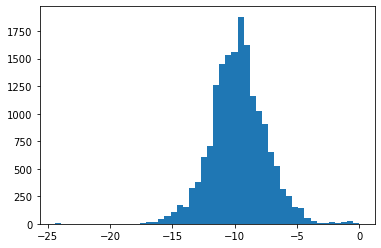

In [7]:
# madf.hist(column='dG')
dgs = madf['dG'].values
print(dgs.min(), dgs.max())
out = plt.hist(dgs, bins=50)

In [30]:
## do cluster for data value and return data index
def valueCluster(d, xs, ids, out):
    if len(xs) == 0:
        return
    x_max = xs.max()
    mask = np.abs(x_max - xs) < d
    pos_ids = np.where(mask)[0]
    neg_ids = np.where(~mask)[0]
    out.append(ids[pos_ids])
    valueCluster(d, xs[neg_ids], ids[neg_ids], out)

out = []
xs = np.array([ -9.54, -12.13, -4.6, -12.13, -9.54, -6])
ids = np.arange(len(xs))
valueCluster(1.0, xs, ids, out)
out

[array([2]), array([5]), array([0, 4]), array([1, 3])]

In [32]:
def f(d):
    return np.max(d, 2.0)

remain_idxs = []
for k, sdf in madf.groupby('key_complex'):
    if len(sdf) <= 1:
        continue
    ref_dgs = sdf['dG'].values
    idx = sdf['dG_ori'].index
    dgs = sdf['dG_ori'].values
    if np.abs(dgs.max() - dgs.min()) < 0.5:
        continue
    diffs = np.abs(dgs - ref_dgs)
    if diffs.max() < 0.5:
        continue
    # z_score = (x - mean) / std
    # zsc = np.abs( (dgs - dgs.mean()) / dgs.var() )
    
    rem_ids = np.where(diffs < 2.0)[0]
    if len(rem_ids) == 0:
#         print(ref_dgs[0], dgs)
        out = []
        ids = np.arange(len(dgs))
        valueCluster(2.0, dgs, ids, out)
        ts = [i for i, x in enumerate(out) if len(x) == 1]
        remove = False
        if len(ts) == 1:
            t = ts[0]
            for g in out:
                if len(g) > 1:
                    if np.abs(dgs[g].mean() - dgs[t]) > 5.0:
                        remove = True
        if remove:
            gs = [x for x in out if len(x) != 1]
            gs = np.concatenate(gs)
            idx = idx[gs]
            dgs = dgs[gs]
        print(dgs)
    else:
        idx = idx[rem_ids]
        dgs = dgs[rem_ids]
        remain_idxs.append(idx)
#     print(dgs)



[-20.02 -20.01 -14.9  -14.89]
[-10.81  -6.71]
[-10.37  -6.28]
[-11.63  -7.53]
[-10.6  -6.5]
[-10.86  -6.76]
[-11.4  -7.3]
[-4.7  -8.96]
[-13.87  -5.14  -5.18]
[-12.69  -8.51]
[-11.07  -4.85]
[-13.76  -9.6 ]
[-15.    -9.54]
[ -9.54 -14.94]
[-15.25  -9.54]
[-14.37  -9.54]
[-16.01  -9.54]
[ -8.65 -12.78]
[ -7.23 -12.78]
[ -8.41 -12.78]
[-17.43 -12.04]
[ -7.72 -11.84  -7.71 -11.83]
[ -7.18 -11.26  -7.17 -11.25]
[-9.68 -4.39]
[-11.31  -7.  ]
[-11.31  -7.  ]
[-13.32  -6.41]
[-9.35 -4.51]
[ -6.28 -10.45]
[-14.16  -9.54]
[ -9.54 -13.7 ]
[-14.37  -9.54]
[ -9.54 -14.31]
[ -9.54 -13.85]
[-14.84  -6.9 ]
[ -6.65 -12.15]
[ -6.65 -10.69]
[ -6.65 -10.9   -6.64 -10.89]
[-9.65 -4.5 ]
[-8.85 -4.58]
[-8.85 -4.58]
[-0.06 -9.07]
[-0.06 -9.07]
[-0.13 -9.15]
[-0.13 -9.15]
[-0.21 -9.24]
[-0.13 -9.15]
[-0.13 -9.15]
[ -7.9  -12.23]
[ -6.12 -12.23]
[ -7.9  -12.23]
[ -7.91 -12.23]
[ -9.31 -15.92]
[-10.54 -15.92]
[-14.08  -8.94]
[-11.15  -7.11]
[-10.41 -17.46 -11.01 -16.91]
[ -7.94 -12.2   -7.94 -12.2 ]
[-7.26 -0.9